# Multi-class Image Classification

We're jsut been thrrough a bunch of the follwing steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [2]:
# Import relevant libraries
import os
import random
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 1. Import and become one with the data

In [3]:
import zipfile

In [4]:
!ls 10_food_classes_all_data/

test
train


In [5]:
!ls 10_food_classes_all_data/train/

chicken_curry
chicken_wings
fried_rice
grilled_salmon
hamburger
ice_cream
pizza
ramen
steak
sushi


In [6]:
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [7]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
# Let's get the subdirectories (these are our class names)
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [9]:
# Define the random image function
def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['3057757.jpg']
Image shape: (512, 384, 3)


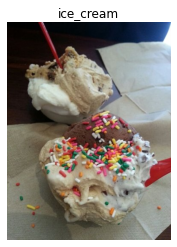

In [31]:
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

In [20]:
random.choice(class_names)

'hamburger'

### 2. Preprocess the data (prepare it for a model)

In [32]:
# Define directory data set paths
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [33]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [36]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              batch_size=32)
test_data = train_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [37]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [38]:
# How many batches are there?
len(train_data)

235

In [39]:
7500/235

31.914893617021278

In [40]:
7500/32

234.375

In [41]:
2500/32

78.125

In [42]:
len(test_data)

79

In [43]:
# Get the first image

images[:1], images[0].shape

(array([[[[0.7294118 , 0.6745098 , 0.62352943],
          [0.7372549 , 0.68235296, 0.6313726 ],
          [0.74509805, 0.6901961 , 0.6392157 ],
          ...,
          [0.8352942 , 0.5411765 , 0.2784314 ],
          [0.79215693, 0.5254902 , 0.28627452],
          [0.8470589 , 0.6117647 , 0.40000004]],
 
         [[0.73333335, 0.6784314 , 0.627451  ],
          [0.7372549 , 0.68235296, 0.6313726 ],
          [0.7568628 , 0.7019608 , 0.6509804 ],
          ...,
          [0.9568628 , 0.6666667 , 0.41960788],
          [0.7294118 , 0.47058827, 0.24313727],
          [0.7686275 , 0.5411765 , 0.34509805]],
 
         [[0.72156864, 0.6666667 , 0.6156863 ],
          [0.72156864, 0.6666667 , 0.6156863 ],
          [0.74509805, 0.6901961 , 0.6392157 ],
          ...,
          [0.8941177 , 0.61960787, 0.37647063],
          [0.7411765 , 0.49411768, 0.28235295],
          [0.49803925, 0.2784314 , 0.08627451]],
 
         ...,
 
         [[0.04313726, 0.03529412, 0.03921569],
          [0.05098

In [44]:
images[7]

array([[[0.48627454, 0.5529412 , 0.7254902 ],
        [0.47450984, 0.5411765 , 0.7137255 ],
        [0.47058827, 0.52156866, 0.69803923],
        ...,
        [0.74509805, 0.23529413, 0.        ],
        [0.7490196 , 0.2392157 , 0.        ],
        [0.75294125, 0.24313727, 0.        ]],

       [[0.5372549 , 0.60784316, 0.7960785 ],
        [0.52156866, 0.58431375, 0.77647066],
        [0.5254902 , 0.5803922 , 0.7725491 ],
        ...,
        [0.7568628 , 0.24705884, 0.00392157],
        [0.7607844 , 0.2509804 , 0.00784314],
        [0.75294125, 0.24313727, 0.        ]],

       [[0.49411768, 0.5803922 , 0.77647066],
        [0.49803925, 0.5764706 , 0.77647066],
        [0.50980395, 0.57254905, 0.77647066],
        ...,
        [0.74509805, 0.24313727, 0.00392157],
        [0.74509805, 0.24313727, 0.00392157],
        [0.7411765 , 0.2392157 , 0.        ]],

       ...,

       [[0.04313726, 0.0509804 , 0.10196079],
        [0.04705883, 0.05490196, 0.10588236],
        [0.03529412, 0

In [46]:
# View the first batch of labels
labels

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 

### 3. Create a CNN model (start with a baseline)

We#re been talking a lot about the CNN explainer website ... how about we just take their model (also on 10 classes) and use it for our project ...

In [47]:
# Make the creating of our model a little bit easier
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [58]:
# Create the multi class model, baseline model with a CNN
model_m1 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          activation="relu",
          input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    
    Flatten(),
    Dense(10, activation="softmax") # change to have 10 outputs neurons (10 classe) and use "softmax" activation function for multi class classificationa
])

In [59]:
# Compile the baseline model
model_m1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [60]:
# Get a summary of the baseline multiclass model, if you like to see what is inside
model_m1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### 4. Fit the model

In [61]:
# You could check the lengths of training and test data generators
len(train_data), len(test_data)

(235, 79)

In [62]:
# Fit the model
history_m1 = model_m1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 432s 2s/step - loss: 2.1383 - accuracy: 0.2256 - val_loss: 2.0500 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 382s 2s/step - loss: 1.8981 - accuracy: 0.3580 - val_loss: 1.8611 - val_accuracy: 0.3532
Epoch 3/5
235/235 [==============================] - 386s 2s/step - loss: 1.5553 - accuracy: 0.4841 - val_loss: 1.9154 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 375s 2s/step - loss: 1.0184 - accuracy: 0.6664 - val_loss: 2.3192 - val_accuracy: 0.3072
Epoch 5/5
235/235 [==============================] - 376s 2s/step - loss: 0.4210 - accuracy: 0.8692 - val_loss: 3.3413 - val_accuracy: 0.2760


In [63]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend();    

### 5. Evaluate the model

In [65]:
# Evaluate the test data
model_m1.evaluate(test_data)

79/79 [==============================] - 28s 350ms/step - loss: 3.3413 - accuracy: 0.2760


[3.341259717941284, 0.2759999930858612]

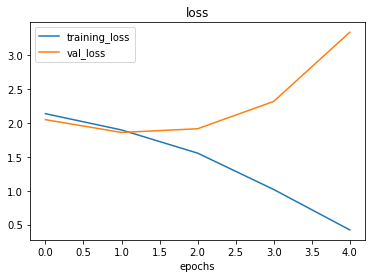

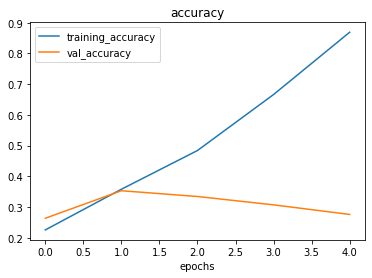

In [64]:
# Check out the loss and the accuracy od multi class model
plot_loss_curves(history_m1)

What do these loss curves tell us?

Well ... it seems our model is **overfitting** the training set quite badly ... in other words, it's getting great results on the training data, yet fails to provide good results to unseen data adn performs poorly on the test dataset.